In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [4]:
df=pd.read_csv('/content/hpq.us.txt',delimiter=',',  usecols=['Date','Open','High','Low','Close'])

In [5]:
df

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385
...,...,...,...,...,...
12070,2017-11-06,21.47000,21.53000,21.38000,21.44000
12071,2017-11-07,21.47000,21.47000,21.32000,21.38000
12072,2017-11-08,21.34000,21.47000,21.24000,21.42000
12073,2017-11-09,21.27000,21.40000,21.15000,21.34000


In [6]:
df=df.sort_values('Date')
df.head(50)

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385
5,1970-01-09,0.31385,0.31768,0.31385,0.31768
6,1970-01-12,0.31768,0.32534,0.31768,0.32534
7,1970-01-13,0.32534,0.32916,0.32152,0.32152
8,1970-01-14,0.32152,0.32534,0.31768,0.32152
9,1970-01-15,0.32152,0.32916,0.32152,0.32916


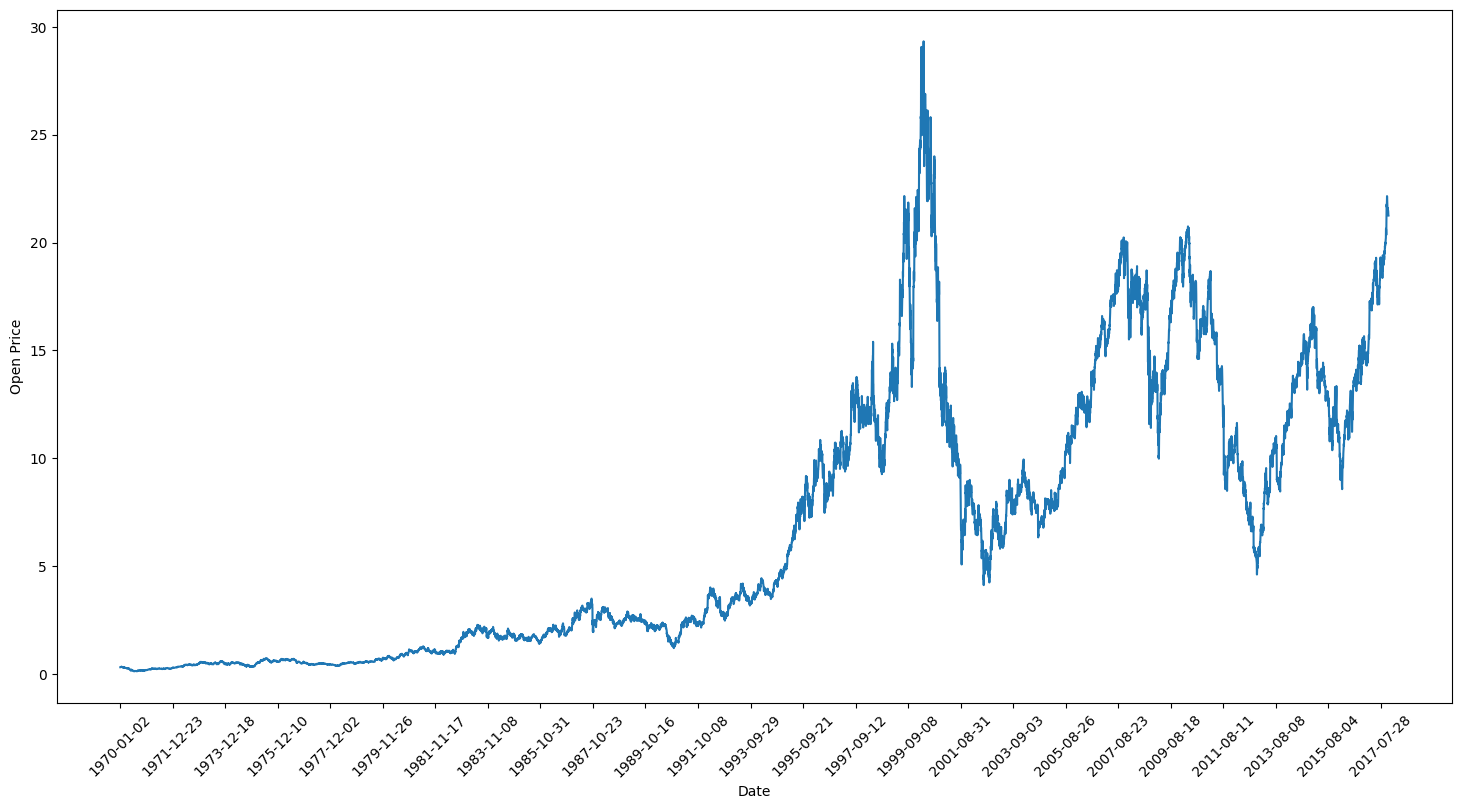

In [7]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

In [8]:
D=df.iloc[:,1:2].values
D

array([[ 0.30627],
       [ 0.30627],
       [ 0.31385],
       ...,
       [21.34   ],
       [21.27   ],
       [21.25   ]])

In [9]:
df.tail(5)

,Date,Open,High,Low,Close
12070,2017-11-06,21.47,21.53,21.38,21.44
12071,2017-11-07,21.47,21.47,21.32,21.38
12072,2017-11-08,21.34,21.47,21.24,21.42
12073,2017-11-09,21.27,21.40,21.15,21.34
12074,2017-11-10,21.25,21.31,21.14,21.23


In [10]:
df.shape

(12075, 5)

In [11]:
Tr_set=D[:10000]
Ts_set=D[10000:]
Ts_set.shape,Tr_set.shape

((2075, 1), (10000, 1))

In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU


In [13]:
sc=MinMaxScaler(feature_range=(0,1))
Tr_scaled=sc.fit_transform(Tr_set)
Ts_scaled=sc.transform(Ts_set)

In [14]:
seq_len=100
X_train=[]
y_train=[]

for i in range(seq_len,len(Tr_scaled)-seq_len):
  X_train.append(Tr_scaled[i-seq_len:i,0])
  y_train.append(Tr_scaled[i,0])


In [15]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [16]:
X_train[0],len(X_train[0])

(array([0.00642261, 0.00642261, 0.00668211, 0.00668211, 0.00668211,
        0.00668211, 0.00681323, 0.00707548, 0.0069447 , 0.0069447 ,
        0.00720626, 0.00707548, 0.0069447 , 0.00720626, 0.00720626,
        0.00707548, 0.0069447 , 0.00681323, 0.00654893, 0.00642261,
        0.00628806, 0.00616002, 0.00616002, 0.00616002, 0.00589812,
        0.0057646 , 0.00628806, 0.00616002, 0.00616002, 0.00628806,
        0.00628806, 0.00642261, 0.00654893, 0.00654893, 0.00654893,
        0.00589812, 0.00589812, 0.00602547, 0.00602547, 0.00602547,
        0.00616002, 0.00563382, 0.00563382, 0.0057646 , 0.00563382,
        0.00550372, 0.00524353, 0.00537294, 0.00537294, 0.00524353,
        0.00524353, 0.00524353, 0.00550372, 0.00537294, 0.00524353,
        0.00524353, 0.00498094, 0.00498094, 0.00510933, 0.00510933,
        0.00498094, 0.00498094, 0.00524353, 0.00524353, 0.00510933,
        0.00445337, 0.00432636, 0.00445337, 0.00445337, 0.0047187 ,
        0.0047187 , 0.0047187 , 0.00458655, 0.00

In [17]:
y_train[0]

0.0014430320722864922

In [18]:
X_test = []
y_test = []
for i in range(seq_len,len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i,0])
    y_test.append(Ts_scaled[i,0])

In [19]:
X_test,y_test = np.array(X_test),np.array(y_test)

In [20]:
X_train.shape

(9800, 100)

In [21]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [22]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [23]:
X_train.shape,X_test.shape

((9800, 100, 1), (1875, 100, 1))

In [32]:
model = Sequential([
    LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(units=50,return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dense(units=1)
])

In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
307/307 [==============================] - 52s 148ms/step - loss: 0.0014
Epoch 2/5
307/307 [==============================] - 45s 146ms/step - loss: 4.0623e-04
Epoch 3/5
307/307 [==============================] - 46s 149ms/step - loss: 3.9485e-04
Epoch 4/5
307/307 [==============================] - 45s 145ms/step - loss: 3.3147e-04
Epoch 5/5
307/307 [==============================] - 46s 151ms/step - loss: 3.1811e-04


In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_7 (Dropout)         (None, 100, 50)           0         
                                                                 
 gru_3 (GRU)                 (None, 50)                15300     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 45951 (179.50 KB)
Trainable params: 4595

In [36]:
y_hat=model.predict(X_test)

59/59 [==============================] - 3s 34ms/step


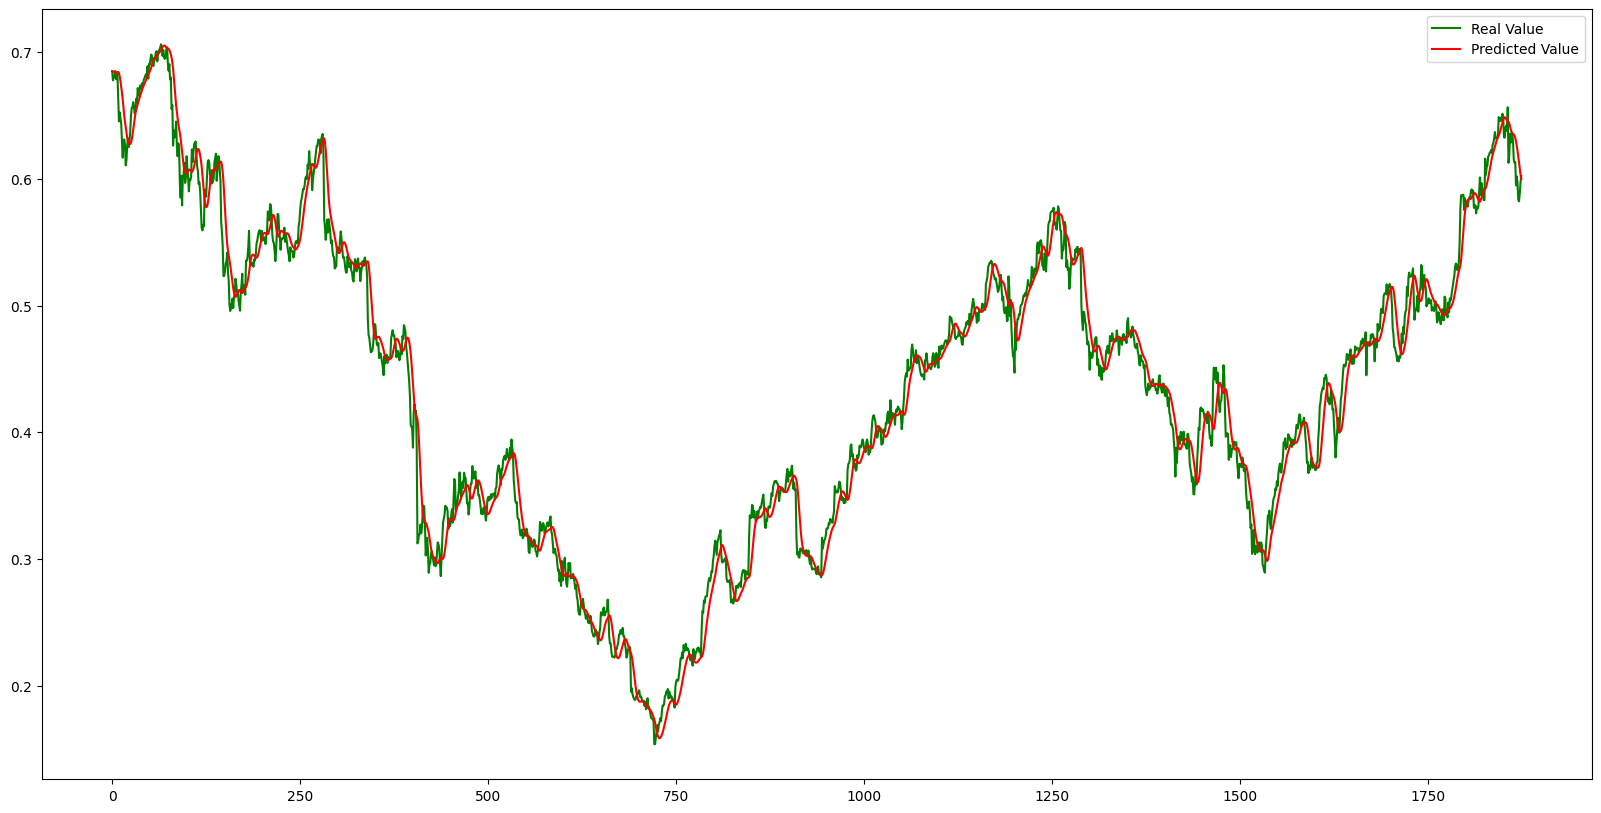

In [37]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color='green',label='Real Value')
plt.plot(y_hat,color='red',label='Predicted Value')
plt.legend()
plt.show()

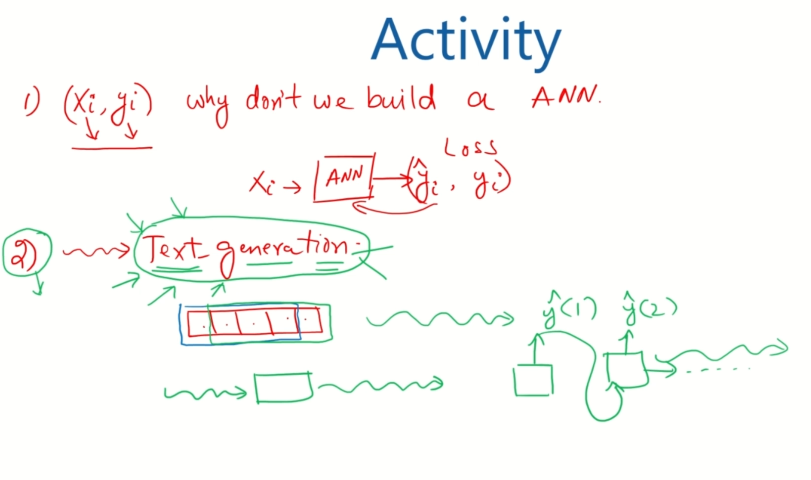